<a id="99"></a>
# Python 4 Assignment
### Purpose: To Engineer Features in the Data
<b>Program Sections</b>
<ul>
<li><a href = "#0">Import Python Packages</a></li>
<li><a href = "#1">Set Display</a></li>
<li><a href = "#2">Load the Data and Evaluate Fields</a></li>
<li><a href = "#3">Feature Coding</a></li> 
<li><a href = "#4">Feature Scaling</a></li>     
<li><a href = "#5">Feature Transformation</a></li>
<li><a href = "#6">Save the Data as a CSV File</a></li>
<li><a href = "#7">Assignment Submission</a></li></ul>

<a id="0"></a>
### Import Python Packages
<a href = "#99">Top</a>

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from matplotlib import style

<a id="1"></a>
### Set Display
<a href = "#99">Top</a>

In [2]:
# Set display to show up to 100 columns in dataframe
pd.set_option('display.max_columns',100) 

<a id="2"></a>
### Load the Data and Evaluate Fields
<a href = "#99">Top</a>

In [3]:
# Read CSV file into dataframe
df_airbnb = pd.read_csv("Boston Airbnb Data - Cleaned.csv",encoding="latin1")

In [4]:
# Provide a listing of the field names in the dataframe
df_airbnb.columns.values

array(['ID', 'Name', 'Host ID', 'Host Name', 'Host Since',
       'Host Location', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Is Superhost', 'Host Listings Count',
       'Host Has Profile Pic', 'Host Identity Verified', 'City',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Number Of Reviews', 'First Review',
       'Last Review', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Instant Bookable', 'Cancellation Policy',
       'Reviews Per Month'], dtype=object)

In [5]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3459 non-null   int64  
 1   Name                         3459 non-null   object 
 2   Host ID                      3459 non-null   int64  
 3   Host Name                    3459 non-null   object 
 4   Host Since                   3459 non-null   object 
 5   Host Location                3448 non-null   object 
 6   Host Response Time           3459 non-null   object 
 7   Host Response Rate           3015 non-null   float64
 8   Host Acceptance Rate         2978 non-null   float64
 9   Host Is Superhost            3459 non-null   object 
 10  Host Listings Count          3459 non-null   int64  
 11  Host Has Profile Pic         3459 non-null   object 
 12  Host Identity Verified       3459 non-null   object 
 13  City              

In [7]:
# Look at the first few rows to see if everything came in cleanly
df_airbnb.head(3)

,ID,Name,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Is Superhost,Host Listings Count,Host Has Profile Pic,Host Identity Verified,City,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number Of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Instant Bookable,Cancellation Policy,Reviews Per Month
0,1341072,"Cozy, One bedroom Condo, Back Bay",4161865,Ally,11/15/2015,"Boston, Massachusetts, United States",within an hour,1.00,0.80,No,2,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,175.0,0.0,75.0,1,0,3,41,7/11/2017,6/11/2019,91.0,9.0,9.0,10.0,10.0,10.0,9.0,No,strict,1.56
1,9460898,Brand NEW South Boston 1 bedroom,1444340,Will,11/25/2014,"Boston, Massachusetts, United States",within a day,0.98,0.68,No,24,Yes,Yes,Boston,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,189.0,500.0,100.0,1,0,2,6,2/18/2019,8/19/2019,100.0,10.0,10.0,10.0,10.0,10.0,10.0,No,strict,0.89
2,13888974,"40 Pontiac street Boston, MA 02120",82250238,Joshi,7/7/2019,"Boston, Massachusetts, United States",within a day,0.50,1.00,No,1,Yes,No,Boston,House,Shared room,1,2.5,1.0,4.0,Real Bed,35.0,0.0,0.0,1,0,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,flexible,NaN


In [8]:
# Show the number of rows and columns in the dataframe
df_airbnb.shape

(3459, 40)

<a id="3"></a>
### Feature Coding
<a href = "#99">Top</a>

##### Code Qualitative Variables

In [10]:
# Show categories and number of observations
df_airbnb['Host Is Superhost'].value_counts()

No     3057
Yes     402
Name: Host Is Superhost, dtype: int64

In [12]:
# Create dummy variables for all category levels
dummies_superhost = pd.get_dummies(df_airbnb['Host Is Superhost'], prefix='superhost', drop_first = False, dtype='int')

# Drop the category level to be used as the base level
dummies_superhost.drop(['superhost_No'], axis = 1, inplace=True)

In [14]:
# Show coding statisics of new dummy variable
print('Count of Superhost Dummy Variable Results')
display(dummies_superhost['superhost_Yes'].value_counts())

# Visually verify that coding is working
print('\nSample of Coding results')
dummies_superhost.sample(10, random_state = 42)

Count of Superhost Dummy Variable Results


0    3057
1     402
Name: superhost_Yes, dtype: int64


Sample of Coding results


,superhost_Yes
665,0
410,0
2686,0
2222,0
2609,0
578,0
602,0
192,0
3311,1
299,0


In [15]:
# Show categories and number of observations
df_airbnb['Host Has Profile Pic'].value_counts()

# Too few "No" responses to be of much use moving forward

Yes    3451
No        8
Name: Host Has Profile Pic, dtype: int64

In [16]:
# Show categories and number of observations
df_airbnb['Host Identity Verified'].value_counts()

Yes    2525
No      934
Name: Host Identity Verified, dtype: int64

In [18]:
# Create dummy variables for all category levels
dummies_verified = pd.get_dummies(df_airbnb['Host Identity Verified'], prefix='verified', drop_first = False, dtype='int')

# Drop the category level to be used as the base level
dummies_verified.drop(['verified_No'], axis = 1, inplace=True)

In [19]:
# Show categories and number of observations
df_airbnb['Property Type'].value_counts()

Apartment          2543
House               548
Condominium         224
Townhouse            51
Loft                 39
Bed & Breakfast      36
Boat                 12
Villa                 6
Name: Property Type, dtype: int64

In [23]:
# Create one-hot encoding variables for all category levels
onehot_property = pd.get_dummies(df_airbnb['Property Type'], prefix='property', drop_first = False, dtype='int')

In [24]:
# Show categories and number of observations
df_airbnb['Room Type'].value_counts()

Entire home/apt    2073
Private room       1317
Shared room          69
Name: Room Type, dtype: int64

In [25]:
# Create one-hot encoding variables for all category levels
onehot_room = pd.get_dummies(df_airbnb['Room Type'], prefix='room', drop_first = False, dtype='int')

In [ ]:
# Show categories and number of observations
_________['Bed Type']._________

In [26]:
# Create one-hot variables for all category levels
onehot_bed = pd.get_dummies(df_airbnb['Bed Type'], prefix='bed', drop_first = False, dtype='int')

In [29]:
# Show categories and number of observations
df_airbnb['Instant Bookable'].value_counts()

No     2893
Yes     566
Name: Instant Bookable, dtype: int64

In [31]:
# Create dummy variables for all category levels
dummies_instabook = pd.get_dummies(df_airbnb['Instant Bookable'], prefix='instabook', drop_first = False, dtype='int')

# Drop the category level to be used as the base level
dummies_instabook.drop(['instabook_No'], axis = 1, inplace=True)

In [32]:
# Show categories and number of observations
df_airbnb['Cancellation Policy'].value_counts()

strict             1535
flexible            949
moderate            902
super_strict_30      73
Name: Cancellation Policy, dtype: int64

In [33]:
# Create one-hot encoding variables for all category levels
onehot_cancel = pd.get_dummies(df_airbnb['Cancellation Policy'], prefix='cancel', drop_first = False, dtype='int')

In [34]:
# Show categories and number of observations
df_airbnb['City'].value_counts()

Boston              3280
Roxbury Crossing      27
Jamaica Plain         25
Brighton              16
Cambridge             15
Charlestown           14
Allston               14
Brookline             14
Dorchester            14
Somerville            13
Roslindale             7
West Roxbury           5
East Boston            4
South Boston           3
Mattapan               3
Hyde Park              2
Milton                 1
Newton                 1
Mission Hill           1
Name: City, dtype: int64

In [35]:
# Create dataframe of Prices in City columns
df_CityPrices = pd.DataFrame({col:vals['Price'] for col, vals in df_airbnb.groupby('City')})

# Calculate the median for each column, sort them, and capture the ordering only
orderedCities = df_CityPrices.median().sort_values(ascending=False).index

# Show ordering of price medians by city
orderedCities

Index(['Cambridge', 'Charlestown', 'South Boston', 'Boston', 'Brookline',
       'Jamaica Plain', 'West Roxbury', 'Newton', 'Roslindale', 'Brighton',
       'Mission Hill', 'East Boston', 'Hyde Park', 'Mattapan',
       'Roxbury Crossing', 'Somerville', 'Allston', 'Dorchester', 'Milton'],
      dtype='object')

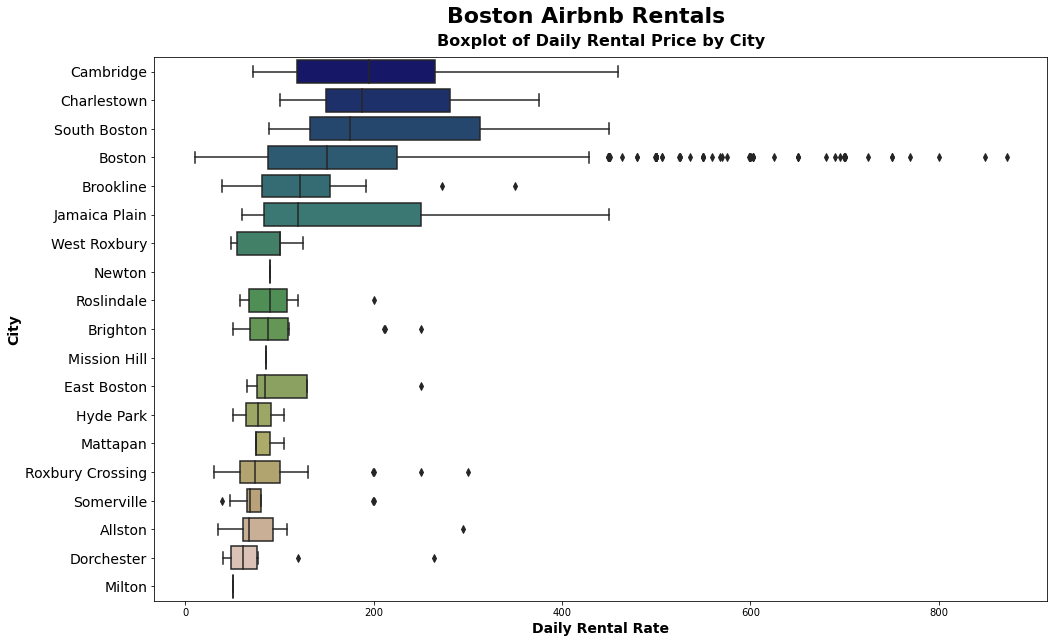

In [41]:
# Look at the distribution of daily rental prices by city
plt.figure(figsize=(16,10))

# Set chart to boxplots of Price by City
chart = sns.boxplot(x = "Price", y = "City", data = df_airbnb, order = df_CityPrices[orderedCities], palette = 'gist_earth')

chart.set_yticklabels(chart.get_yticklabels(), fontsize='14', 
                      horizontalalignment='right')

plt.suptitle('Boston Airbnb Rentals', fontweight='bold', 
          fontsize='22', horizontalalignment='center', y=.95)

plt.title('Boxplot of Daily Rental Price by City', fontweight='bold', 
          fontsize='16', horizontalalignment='center', y=1.01)

plt.xlabel('Daily Rental Rate', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.ylabel('City', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.show()

In [42]:
# Create mapping of cities to groups. All low median cities will be binned together
mapCities = {'Cambridge': 'Cambridge', 
             'Charlestown': 'Charlestown',
             'South Boston': 'Boston',
             'Boston': 'Boston',
             'Brookline': 'Brookline',       
             'Jamaica Plain':'Jamaica Plain', 
             'West Roxbury': 'Other', 
             'Newton': 'Other',
             'Roslindale': 'Other', 
             'Brighton': 'Other',
             'Mission Hill': 'Other', 
             'East Boston': 'Other',
             'Hyde Park': 'Other',
             'Mattapan': 'Other',
             'Roxbury Crossing': 'Other',
             'Somerville': 'Other',
             'Allston': 'Other',
             'Dorchester': 'Other',
             'Milton': 'Other'}

# Apply map to create new fields named City Bins
df_airbnb['City Bins'] = df_airbnb['City'].map(mapCities)

In [43]:
df_airbnb['City Bins'].value_counts()

Boston           3283
Other             108
Jamaica Plain      25
Cambridge          15
Charlestown        14
Brookline          14
Name: City Bins, dtype: int64

In [45]:
# Create one-hot encoding variables for all category levels
onehot_citybins = pd.get_dummies(df_airbnb['City Bins'], prefix='citybins', drop_first = False, dtype='int')

In [48]:
# Combine all fields into original dataframe
df_airbnb = pd.concat([df_airbnb, dummies_superhost, dummies_verified, onehot_property,  
                       onehot_room, onehot_bed, dummies_instabook, onehot_cancel, onehot_citybins], axis = 1)

In [49]:
# Check to see if all the new features are in the dataframe
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3459 non-null   int64  
 1   Name                         3459 non-null   object 
 2   Host ID                      3459 non-null   int64  
 3   Host Name                    3459 non-null   object 
 4   Host Since                   3459 non-null   object 
 5   Host Location                3448 non-null   object 
 6   Host Response Time           3459 non-null   object 
 7   Host Response Rate           3015 non-null   float64
 8   Host Acceptance Rate         2978 non-null   float64
 9   Host Is Superhost            3459 non-null   object 
 10  Host Listings Count          3459 non-null   int64  
 11  Host Has Profile Pic         3459 non-null   object 
 12  Host Identity Verified       3459 non-null   object 
 13  City              

<a id="4"></a>
### Feature Scaling
<a href = "#99">Top</a>

##### Standardize all Review Scores

In [50]:
# Collect a list of all Review Score fields
reviewScores = df_airbnb.filter(regex='^Review Scores',axis=1).columns.values

# Show descriptive statistics on original review scores
df_airbnb[reviewScores].describe()

,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,2731.000000,2720.000000,2725.000000,2723.000000,2725.000000,2721.000000,2722.000000
mean,91.975101,9.437868,9.263119,9.651855,9.656881,9.415656,9.176341
std,9.495715,0.923618,1.162044,0.758967,0.723576,0.898711,1.006659
min,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000
25%,89.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
75%,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [51]:
# Create temporary dataframe to just include review scores for visualization
df = pd.DataFrame(data = df_airbnb, columns = reviewScores)
print('Sample of Original Data within Limited Fields')
display(df.sample(5, random_state = 42))

# Melt the data to put the results in a single coumn labeled by variable name
print('\nSample of Melted Form of the Same Data')
df_melt = pd.melt(df)
df_melt.sample(5, random_state = 42)

Sample of Original Data within Limited Fields


,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
665,40.0,10.0,10.0,4.0,4.0,10.0,4.0
410,93.0,10.0,9.0,10.0,10.0,10.0,10.0
2686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2222,93.0,10.0,9.0,10.0,10.0,9.0,9.0
2609,90.0,9.0,9.0,10.0,10.0,10.0,9.0



Sample of Melted Form of the Same Data


,variable,value
20810,Review Scores Value,9.0
19494,Review Scores Location,10.0
5187,Review Scores Accuracy,9.0
640,Review Scores Rating,95.0
5351,Review Scores Accuracy,9.0


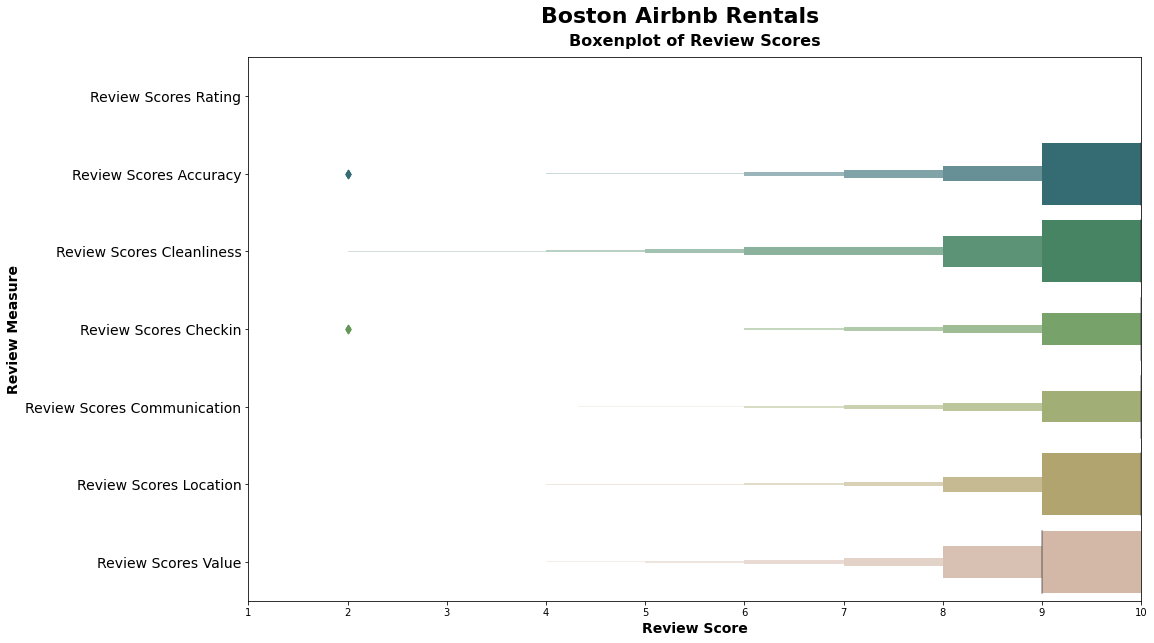

In [52]:
# Look at the distribution of review scores by measure
plt.figure(figsize=(16,10))

# Set chart to boxplots by Property Type
chart = sns.boxenplot(x = 'value', y = 'variable', data = df_melt, 
                      palette = 'gist_earth')

chart.set(xlim=(1, 10))

chart.set_yticklabels(chart.get_yticklabels(), fontsize='14', 
                      horizontalalignment='right')

plt.suptitle('Boston Airbnb Rentals', fontweight='bold', 
          fontsize='22', horizontalalignment='center', y=.95)

plt.title('Boxenplot of Review Scores', fontweight='bold', 
          fontsize='16', horizontalalignment='center', y=1.01)

plt.xlabel('Review Score', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.ylabel('Review Measure', fontweight='bold', 
           fontsize='14', horizontalalignment='center')

plt.show()

##### Rescale Review Scores

In [53]:
# Apply MinMaxScaler to review scores that were separated earlier into their own dataframe, df
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=(reviewScores)) * 9 + 1

In [54]:
# Show statistics on MinMaxScaled review scores
df.describe()

,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,2731.000000,2720.000000,2725.000000,2723.000000,2725.000000,2721.000000,2722.000000
mean,9.097199,9.367601,9.171009,9.608336,9.485321,9.342613,9.073384
std,1.068268,1.039071,1.307300,0.853838,1.085364,1.011050,1.132491
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.762500,8.875000,8.875000,10.000000,10.000000,8.875000,8.875000
50%,9.437500,10.000000,10.000000,10.000000,10.000000,10.000000,8.875000
75%,9.887500,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [55]:
# Drop original review scores from dataframe
df_airbnb.drop(columns=(reviewScores), inplace=True)

# Concatenate new scaled review scores with dataframe
df_airbnb = pd.concat([df_airbnb, df], axis = 1)

<a id="5"></a>
### Feature Transformation
<a href = "#99">Top</a>

##### Guests Not Included ... and some additional data cleansing

In [56]:
# Create feature that measure how many guests are not included in base price quote
df_airbnb['Guests Not Included'] = df_airbnb['Accommodates'] \
                                   - df_airbnb['Guests Included']

df_airbnb['Guests Not Included'].describe()
# There are clearly some problems with these results ... negative values?

count    3459.000000
mean        1.620121
std         1.555865
min       -13.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: Guests Not Included, dtype: float64

In [57]:
# Show the records that have a negative Guests Not Included value
df_airbnb.loc[df_airbnb["Guests Not Included"] < 0]

,ID,Name,Host ID,Host Name,Host Since,Host Location,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Is Superhost,Host Listings Count,Host Has Profile Pic,Host Identity Verified,City,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Number Of Reviews,First Review,Last Review,Instant Bookable,Cancellation Policy,Reviews Per Month,City Bins,superhost_Yes,verified_Yes,property_Apartment,property_Bed & Breakfast,property_Boat,property_Condominium,property_House,property_Loft,property_Townhouse,property_Villa,room_Entire home/apt,room_Private room,room_Shared room,bed_Airbed,bed_Couch,bed_Futon,bed_Pull-out Sofa,bed_Real Bed,instabook_Yes,cancel_flexible,cancel_moderate,cancel_strict,cancel_super_strict_30,citybins_Boston,citybins_Brookline,citybins_Cambridge,citybins_Charlestown,citybins_Jamaica Plain,citybins_Other,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Guests Not Included
351,3432321,"Large, Sunny Beacon Hill Studio",17288874,Joseph,6/25/2017,US,within a day,1.00,1.00,No,1,Yes,No,Boston,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,220.0,350.0,85.0,3,0,1,82,7/7/2017,10/26/2018,No,strict,3.10,Boston,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,9.3250,10.000,8.875,10.000,10.0,10.000,8.875,-1
420,8631257,Cozy private bedroom,14299534,Peng,4/14/2017,"Boston, Massachusetts, United States",within an hour,NaN,NaN,No,1,Yes,No,Boston,Loft,Private room,1,1.5,1.0,1.0,Real Bed,50.0,100.0,15.0,2,20,1,0,NaN,NaN,No,strict,NaN,Boston,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
423,3006311,Spacious cozy Little Italy,5695034,Elizabeth,3/29/2016,"Boston, Massachusetts, United States",within a day,1.00,0.85,No,2,Yes,Yes,Boston,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,145.0,300.0,25.0,4,0,2,7,7/6/2017,8/9/2019,No,strict,0.26,Boston,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,9.3250,10.000,10.000,8.875,10.0,10.000,10.000,-2
508,10607657,The Heart of Cleveland Circle,314580,Jesse,12/8/2013,"Boston, Massachusetts, United States",within an hour,1.00,0.92,No,1,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,175.0,0.0,50.0,3,25,2,6,4/24/2019,8/28/2019,No,strict,1.31,Boston,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,9.2125,10.000,10.000,10.000,10.0,10.000,8.875,-1
607,13445221,"Great 2 bedrooms, 2 baths North End (M-G",5578043,Dror,3/21/2016,"New York, New York, United States",within an hour,1.00,1.00,No,11,Yes,No,Boston,Apartment,Entire home/apt,4,2.0,2.0,4.0,Real Bed,299.0,0.0,95.0,6,25,2,1,9/6/2019,9/6/2019,Yes,strict,1.00,Boston,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
700,585148,Trendy Loft in the South End,2883829,George,7/9/2015,"Boston, Massachusetts, United States",within an hour,1.00,1.00,No,5,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,225.0,500.0,80.0,3,100,2,31,7/31/2017,6/20/2019,No,strict,1.21,Boston,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,9.2125,10.000,8.875,8.875,10.0,8.875,8.875,-1
1084,23668,Furnished 1BR At The Vesta,25188,Seamless,7/9/2012,US,within a few hours,0.89,0.45,No,558,Yes,Yes,Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,249.0,0.0,150.0,4,0,4,0,NaN,NaN,No,super_strict_30,NaN,Boston,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
1386,11470818,Brownstone on Charming Dead End St.,32870796,Jessica,5/6/2018,"Boston, Massachusetts, United States",within a few hours,0.90,0.73,No,2,Yes,No,Boston,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,300.0,500.0,50.0,4,0,2,8,3/17/2019,7/22/2019,No,strict,1.37,Boston,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,10.0000,10.000,10.000,8.875,10.0,10.000,10.000,-2
1395,12320063,room in beautiful house,66

In [58]:
# Set condition to catch negative guests note included
condition = df_airbnb['Guests Not Included'].lt(0)

# Set Guests included to be equal to amount Accommodated if condition met
df_airbnb['Guests Included'] = np.where(condition, 
                                        df_airbnb['Accommodates'], 
                                        df_airbnb['Guests Included'])

# Reset Guests Not Included, when negative, to zero
df_airbnb['Guests Not Included'] = np.where(condition, 
                                            0, 
                                            df_airbnb['Guests Not Included'])

##### Create Beds per Included Guest feature

In [59]:
# Calculate Guests Included per Bed at the property

# Define function to error catch for zero beds
def guestsPerBed(df):
  if df['Beds'] == 0:
    return 0
  else: 
    return df['Guests Included'] / df['Beds']

# Apply function to dataframe
df_airbnb['Guests per Bed'] = df_airbnb.apply(guestsPerBed, axis=1)

# Show results of new field
df_airbnb['Guests per Bed'].describe()

count    3459.000000
mean        0.975433
std         0.494651
min         0.000000
25%         0.500000
50%         1.000000
75%         1.000000
max         4.000000
Name: Guests per Bed, dtype: float64

##### Create Accommodated Guests per Bathroom feature

In [60]:
# Calculate Accommodated Guests per Bathroom feature at the property

# Define function to error catch for zero bathrooms
def accommodatesPerBathroom(df):
  if df['Bathrooms'] == 0: 
    return 0
  else: 
    return df['Accommodates'] / df['Bathrooms']

# Apply function to dataframe
df_airbnb['Accommodates per Bathroom'] = df_airbnb.apply(accommodatesPerBathroom, axis=1)

# Show results of new field
df_airbnb['Accommodates per Bathroom'].describe()

count    3459.000000
mean        2.586993
std         1.386868
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Accommodates per Bathroom, dtype: float64

<a id="6"></a>
### Save the Dataframe as a CSV File
<a href = "#99">Top</a>

In [61]:
# Save the dataframe as a CSV file for the next assignment
# This way you will not have to re-transform the data before analyzing it
df_airbnb.to_csv('Boston Airbnb Python Data with Features.csv', index=False)

<a id="7"></a>
### Assignment Submission
<a href = "#99">Top</a>

## Python Assignment 4
### Name: George Gannon

In [64]:
# Provide the mean values for select fields by property type
cols = ['Price', 'Host Acceptance Rate','Bedrooms', 'Review Scores Rating', 
        'Guests Not Included', 'Guests per Bed', 'Accommodates per Bathroom']
df_airbnb.groupby('Property Type')[cols].mean().round(2)

,Price,Host Acceptance Rate,Bedrooms,Review Scores Rating,Guests Not Included,Guests per Bed,Accommodates per Bathroom
Property Type,,,,,,,
Apartment,175.76,0.84,1.23,9.05,1.67,0.98,2.69
Bed & Breakfast,134.75,0.92,1.03,9.23,1.00,1.12,2.11
Boat,268.83,0.65,1.83,9.04,4.00,0.55,4.61
Condominium,191.01,0.90,1.34,9.38,1.62,0.99,2.68
House,128.87,0.91,1.39,9.13,1.51,0.93,2.14
Loft,185.41,0.87,1.10,9.59,1.38,1.07,2.50
Townhouse,153.24,0.95,1.16,9.43,1.04,1.05,1.89
Villa,189.50,0.97,1.00,9.94,2.17,0.83,3.07


In [63]:
import datetime, socket
print(datetime.datetime.now().isoformat())
print("Your Computer Name is: " + socket.gethostname())
print("Your Computer IP Address is: " + socket.gethostbyname(socket.gethostname()))

2020-10-11T14:59:17.958179
Your Computer Name is: DESKTOP-0VRDGNF
Your Computer IP Address is: 192.168.1.139
